# Introduction to Machine Learning:
Examples of Unsupervised and Supervised Machine-Learning Algorithms 
========

##### Version 0.1

Broadly speaking, machine-learning methods constitute a diverse collection of data-driven algorithms designed to classify/characterize/analyze sources in multi-dimensional spaces. The topics and studies that fall under the umbrella of machine learning is growing, and there is no good catch-all definition. The number (and variation) of algorithms is vast, and beyond the scope of these exercises. While we will discuss a few specific algorithms today, more importantly, we will explore the scope of the two general methods: unsupervised learning and supervised learning and introduce the powerful (and dangerous?) Python package [`scikit-learn`](http://scikit-learn.org/stable/).

***
By AA Miller

2017 September 16

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1) Introduction to `scikit-learn`

At the most basic level, `scikit-learn` makes machine learning extremely easy within `python`. By way of example, here is a short piece of code that builds a complex, non-linear model to classify sources in the Iris data set that we learned about earlier:

    from sklearn import datasets
    from sklearn.ensemble import RandomForestClassifier
    iris = datasets.load_iris()
    RFclf = RandomForestClassifier().fit(iris.data, iris.target)

Those 4 lines of code have constructed a model that is superior to any system of hard cuts that we could have encoded while looking at the multidimensional space. This can be fast as well: execute the dummy code in the cell below to see how "easy" machine-learning is with `scikit-learn`.

In [2]:
# execute dummy code here

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
iris = datasets.load_iris()
RFclf = RandomForestClassifier().fit(iris.data, iris.target)

Generally speaking, the procedure for `scikit-learn` is uniform across all machine-learning algorithms. Models are accessed via the various modules (`ensemble`, `SVM`, `neighbors`, etc), with user-defined tuning parameters. The features (or data) for the models are stored in a 2D array, `X`, with rows representing individual sources and columns representing the corresponding feature values. [In a minority of cases, `X`, represents a similarity or distance matrix where each entry represents the distance to every other source in the data set.] In cases where there is a known classification or scalar value (typically supervised methods), this information is stored in a 1D array `y`. 

Unsupervised models are fit by calling `.fit(X)` and supervised models are fit by calling `.fit(X, y)`. In both cases, predictions for new observations, `Xnew`, can be obtained by calling `.predict(Xnew)`. Those are the basics and beyond that, the details are algorithm specific, but the documentation for essentially everything within `scikit-learn` is excellent, so read the docs.

To further develop our intuition, we will now explore the Iris dataset a little further.

**Problem 1a** What is the pythonic type of `iris`?

In [5]:
type(iris) # complete

sklearn.datasets.base.Bunch

You likely haven't encountered a `scikit-learn Bunch` before. It's functionality is essentially the same as a dictionary. 

**Problem 1b** What are the keys of iris?

In [9]:
iris.keys()# complete

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Most importantly, iris contains `data` and `target` values. These are all you need for `scikit-learn`, though the feature and target names and description are useful.

**Problem 1c** What is the shape and content of the `iris` data?

In [14]:
print(np.shape(iris['data'])) # complete
#print(iris['data'])# complete

(150, 4)


**Problem 1d** What is the shape and content of the `iris` target?

In [32]:
print(np.shape(iris['target_names'])) # complete
print(iris['feature_names'])# complete
print(iris['data'][:,0])# complete
print(iris['target_names'])# complete


(3,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 5.1  4.9  4.7  4.6  5.   5.4  4.6  5.   4.4  4.9  5.4  4.8  4.8  4.3  5.8
  5.7  5.4  5.1  5.7  5.1  5.4  5.1  4.6  5.1  4.8  5.   5.   5.2  5.2  4.7
  4.8  5.4  5.2  5.5  4.9  5.   5.5  4.9  4.4  5.1  5.   4.5  4.4  5.   5.1
  4.8  5.1  4.6  5.3  5.   7.   6.4  6.9  5.5  6.5  5.7  6.3  4.9  6.6  5.2
  5.   5.9  6.   6.1  5.6  6.7  5.6  5.8  6.2  5.6  5.9  6.1  6.3  6.1  6.4
  6.6  6.8  6.7  6.   5.7  5.5  5.5  5.8  6.   5.4  6.   6.7  6.3  5.6  5.5
  5.5  6.1  5.8  5.   5.6  5.7  5.7  6.2  5.1  5.7  6.3  5.8  7.1  6.3  6.5
  7.6  4.9  7.3  6.7  7.2  6.5  6.4  6.8  5.7  5.8  6.4  6.5  7.7  7.7  6.
  6.9  5.6  7.7  6.3  6.7  7.2  6.2  6.1  6.4  7.2  7.4  7.9  6.4  6.3  6.1
  7.7  6.3  6.4  6.   6.9  6.7  6.9  5.8  6.8  6.7  6.7  6.3  6.5  6.2  5.9]
['setosa' 'versicolor' 'virginica']


Finally, as a baseline for the exercises that follow, we will now make a simple 2D plot showing the separation of the 3 classes in the iris dataset. This plot will serve as the reference for examining the quality of the clustering algorithms. 

**Problem 1e** Make a scatter plot showing sepal length vs. sepal width for the iris data set. Color the points according to their respective classes. 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


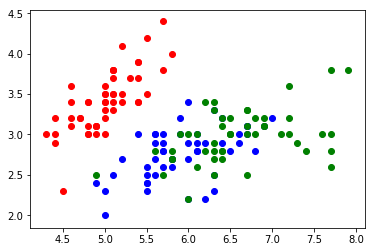

In [41]:
print(iris.feature_names)  # shows that sepal length is first feature and sepal width is second feature
x = iris['data'][:,0]
y = iris['data'][:,1]
plt.scatter(x[iris['target']==0],y[iris['target']==0],facecolor='red') # complete
plt.scatter(x[iris['target']==1],y[iris['target']==1],facecolor='blue')# complete
plt.scatter(x[iris['target']==2],y[iris['target']==2],facecolor='green')# complete

## Problem 2) Unsupervised Machine Learning

Unsupervised machine learning, sometimes referred to as clustering or data mining, aims to group or classify sources in the multidimensional feature space. The "unsupervised" comes from the fact that there are no target labels provided to the algorithm, so the machine is asked to cluster the data "on its own." The lack of labels means there is no (simple) method for validating the accuracy of the solution provided by the machine (though sometimes simple examination can show the results are **terrible**). 

For this reason [*note* - this is my (AAM) opinion and there many be many others who disagree], unsupervised methods are not particularly useful for astronomy. Supposing one did find some useful clustering structure, an adversarial researcher could always claim that the current feature space does not accurately capture the physics of the system and as such the clustering result is not interesting or, worse, erroneous. The one potentially powerful exception to this broad statement is outlier detection, which can be a branch of both unsupervised and supervised learning. Finding weirdo objects is an astronomical pastime, and there are unsupervised methods that may help in that regard in the LSST era. 

To begin today we will examine one of the most famous, and simple, clustering algorithms: [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering). $k$-means clustering looks to identify $k$ convex clusters, where $k$ is a user defined number. And here-in lies the rub: if we truly knew the number of clusters in advance, we likely wouldn't need to perform any clustering in the first place. This is the major downside to $k$-means. Operationally, pseudocode for the algorithm can be summarized as the following: 

    initiate search by identifying k points (i.e. the cluster centers)
    loop 
        assign each point in the data set to the closest cluster center
        calculate new cluster centers based on mean position of all points within cluster
        if diff(new center - old center) < threshold:
            stop (i.e. clusters are defined)

The threshold is defined by the user, though in some cases the total number of iterations is also. An advantage of $k$-means is that the solution will always converge, though the solution may only be a local minimum. Disadvantages include the assumption of convexity, i.e. difficult to capture complex geometry, and the curse of dimensionality.

In `scikit-learn` the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) algorithm is implemented as part of the [`sklearn.cluster`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module. 

**Problem 2a** Fit two different $k$-means models to the iris data, one with 2 clusters and one with 3 clusters. Plot the resulting clusters in the sepal length-sepal width plane (same plot as above). How do the results compare to the true classifications?

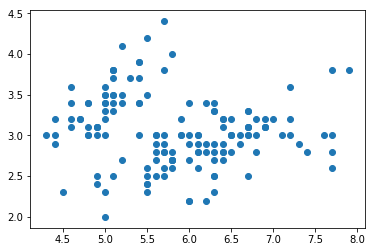

In [51]:
from sklearn.cluster import KMeans

Kcluster = KMeans(n_clusters=2) # complete
Kcluster.fit(iris['data']) # complete

plt.figure()
plt.scatter(iris['data'][:,0],iris['data'][:,1]) # complete

# complete
# complete
# complete
# complete

In [46]:
from sklearn.cluster import KMeans
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  max_iter : int, default: 300
 |      Maximum number of iterations of the k-means algorithm for a
 |      single run.
 |  
 |  n_init : int, default: 10
 |      Number of time the k-means algorithm will be run with different
 |      centroid seeds. The final results will be the best output of
 |      n_init consecutive runs in terms of inertia.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up co

With 3 clusters the algorithm does a good job of separating the three classes. However, without the a priori knowledge that there are 3 different types of iris, the 2 cluster solution would appear to be superior. 

**Problem 2b** How do the results change if the 3 cluster model is called with `n_init = 1` and `init = 'random'` options? Use `rs` for the random state [this allows me to cheat in service of making a point].

*Note - the respective defaults for these two parameters are 10 and `k-means++`, respectively. Read the docs to see why these choices are, likely, better than those in 2b. 

In [ ]:
rs = 14
Kcluster1 = KMeans( # complete
# complete
# complete
# complete

**A random aside that is not particularly relevant here**

$k$-means evaluates the Euclidean distance between individual sources and cluster centers, thus, the magnitude of the individual features has a strong effect on the final clustering outcome. 

**Problem 2c** Calculate the mean, standard deviation, min, and max of each feature in the iris data set. Based on these summaries, which feature is most important for clustering? 

In [ ]:
print("feature\t\t\tmean\tstd\tmin\tmax")
for featnum, feat in enumerate(iris.feature_names):
    print("{:s}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(feat, np.mean(iris.data[:,featnum]), 
                                                        np.std(iris.data[:,featnum]), np.min(iris.data[:,featnum]),
                                                        np.max(iris.data[:,featnum])))

Petal length has the largest range and standard deviation, thus, it will have the most "weight" when determining the $k$ clusters. 

The truth is that the iris data set is fairly small and straightfoward. Nevertheless, we will now examine the clustering results after re-scaling the features. [Some algorithms, *cough* Support Vector Machines *cough*, are notoriously sensitive to the feature scaling, so it is important to know about this step.] Imagine you are classifying stellar light curves: the data set will include contact binaries with periods of $\sim 0.1 \; \mathrm{d}$ and Mira variables with periods of $\gg 100 \; \mathrm{d}$. Without re-scaling, this feature that covers 4 orders of magnitude may dominate all others in the final model projections.

The two most common forms of re-scaling are to rescale to a guassian with mean $= 0$ and variance $= 1$, or to rescale the min and max of the feature to $[0, 1]$. The best normalization is problem dependent. The [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module makes it easy to re-scale the feature set. **It is essential that the same scaling used for the training set be used for all other data run through the model.** The testing, validation, and field observations cannot be re-scaled independently. This would result in meaningless final classifications/predictions. 

**Problem 2d** Re-scale the features to normal distributions, and perform $k$-means clustering on the iris data. How do the results compare to those obtained earlier? 

*Hint - you may find [`'StandardScaler()'`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) within the `sklearn.preprocessing` module useful.*

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit( # complete

# complete
# complete
# complete
# complete

These results are almost identical to those obtained without scaling. This is due to the simplicity of the iris data set. 

**How do I test the accuracy of my clusters?**

Essentially - you don't. There are some methods that are available, but they essentially compare clusters to labeled samples, and if the samples are labeled it is likely that supervised learning is more useful anyway. If you are curious, `scikit-learn` does provide some [built-in functions for analyzing clustering](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation), but again, it is difficult to evaluate the validity of any newly discovered clusters. 

**What if I don't know how many clusters are present in the data?**

An excellent question, as you will almost never know this a priori. Many algorithms, like $k$-means, do require the number of clusters to be specified, but some other methods do not. As an example [`DBSCAN`](https://en.wikipedia.org/wiki/DBSCAN). In brief, `DBSCAN` requires two parameters: `minPts`, the minimum number of points necessary for a cluster, and $\epsilon$, a distance measure. Clusters are grown by identifying *core points*, objects that have at least `minPts` located within a distance $\epsilon$. *Reachable points* are those within a distance $\epsilon$ of at least one *core point* but less than `minPts` *core points*. Identically, these points define the outskirts of the clusters. Finally, there are also *outliers* which are points that are $> \epsilon$ away from any *core points*. Thus, `DBSCAN` naturally identifies clusters, does not assume clusters are convex, and even provides a notion of outliers. The downsides to the algorithm are that the results are highly dependent on the two tuning parameters, and that clusters of highly different densities can be difficult to recover (because $\epsilon$ and `minPts` is specified for all clusters. 

In `scitkit-learn` the 
[`DBSCAN`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN) algorithm is part of the `sklearn.cluster` module. $\epsilon$ and `minPts` are set by `eps` and `min_samples`, respectively. 

**Problem 2e** Cluster the iris data using `DBSCAN`. Play around with the tuning parameters to see how they affect the final clustering results. How does the use of `DBSCAN` compare to $k$-means? Can you obtain 3 clusters with `DBSCAN`? If not, given the knowledge that the iris dataset has 3 classes - does this invalidate `DBSCAN` as a viable algorithm?

*Note - DBSCAN labels outliers as $-1$, and thus, `plt.scatter()`, will plot all these points as the same color.*


In [ ]:
# execute this cell

from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = 0.7, min_samples = 7)
dbs.fit(scaler.transform(iris.data)) # best to use re-scaled data since eps is in absolute units

dbs_outliers = dbs.labels_ == -1

plt.figure()
plt.scatter(iris.data[:,0], iris.data[:,1], c = dbs.labels_, s = 30, edgecolor = "None", cmap = "viridis")
plt.scatter(iris.data[:,0][dbs_outliers], iris.data[:,1][dbs_outliers], s = 30, c = 'k')


plt.xlabel('sepal length')
plt.ylabel('sepal width')

I was unable to obtain 3 clusters with `DBSCAN`. While these results are, on the surface, worse than what we got with $k$-means, my suspicion is that the 4 features do not adequately separate the 3 classes. [See - a nayseyer can always make that argument.] This is not a problem for `DBSCAN` as an algorithm, but rather, evidence that no single algorithm works well in all cases. 

## Challenge Problem) Cluster SDSS Galaxy Data

The following query will select 10k likely galaxies from the SDSS database and return the results of that query into an [`astropy.Table`](http://docs.astropy.org/en/stable/table/) object. (For now, if you are not familiar with the SDSS DB schema, don't worry about this query, just know that it returns a bunch of photometric features.)

In [ ]:
from astroquery.sdss import SDSS  # enables direct queries to the SDSS database

GALquery = """SELECT TOP 10000 
             p.dered_u - p.dered_g as ug, p.dered_g - p.dered_r as gr, 
             p.dered_g - p.dered_i as gi, p.dered_g - p.dered_z as gz,             
             p.petroRad_i, p.petroR50_i, p.deVAB_i
             FROM PhotoObjAll AS p JOIN specObjAll s ON s.bestobjid = p.objid
             WHERE p.mode = 1 AND s.sciencePrimary = 1 AND p.clean = 1 AND p.type = 3
               """
SDSSgals = SDSS.query_sql(GALquery)
SDSSgals

I have used my own domain knowledge to specifically choose features that may be useful when clustering galaxies. If you know a bit about SDSS and can think of other features that may be useful feel free to add them to the query. 

One nice feature of `astropy` tables is that they can readily be turned into `pandas DataFrames`, which can in turn easily be turned into a `sklearn X` array with `NumPy`. For example: 

    X = np.array(SDSSgals.to_pandas())

And you are ready to go. 

**Challenge Problem** Using the SDSS dataset above, identify interesting clusters within the data [this is intentionally very open ended, if you uncover anything especially exciting you'll have a chance to share it with the group]. Feel free to use the algorithms discussed above, or any other packages available via `sklearn`. Can you make sense of the clusters in the context of galaxy evolution? 

*Hint - don't fret if you know nothing about galaxy evolution (neither do I!). Just take a critical look at the clusters that are identified*

In [ ]:
# complete

Note - I was unable to get the galaxies to clusster using DBSCAN.

## Problem 3) Supervised Machine Learning

Supervised machine learning, on the other hand, aims to predict a target class or produce a regression result based on the location of labelled sources (i.e. the training set) in the multidimensional feature space. The "supervised" comes from the fact that we are specifying the allowed outputs from the model. As there are labels available for the training set, it is possible to estimate the accuracy of the model (though there are generally important caveats about generalization, which we will explore in further detail later).

We will begin with a simple, but nevertheless, elegant algorithm for classification and regression: [$k$-nearest-neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) ($k$NN). In brief, the classification or regression output is determined by examining the $k$ nearest neighbors in the training set, where $k$ is a user defined number. Typically, though not always, distances between sources are Euclidean, and the final classification is assigned to whichever class has a plurality within the $k$ nearest neighbors (in the case of regression, the average of the $k$ neighbors is the output from the model). We will experiment with the steps necessary to optimize $k$, and other tuning parameters, in the detailed break-out problem.

In `scikit-learn` the [`KNeighborsClassifer`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm is implemented as part of the [`sklearn.neighbors`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) module. 

**Problem 3a** 

Fit two different $k$NN models to the iris data, one with 3 neighbors and one with 10 neighbors. Plot the resulting class predictions in the sepal length-sepal width plane (same plot as above). How do the results compare to the true classifications? Is there any reason to be suspect of this procedure?

*Hint - after you have constructed the model, it is possible to obtain model predictions using the `.predict()` method, which requires a feature array, including the same features and order as the training set, as input.*

*Hint that isn't essential, but is worth thinking about - should the features be re-scaled in any way?*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNNclf = KNeighborsClassifier( # complete
preds = KNNclf.predict( # complete
plt.figure()
plt.scatter( # complete

# complete
# complete
# complete

These results are almost identical to the training classifications. However, we have cheated! In this case we are evaluating the accuracy of the model (98% in this case) using the same data that defines the model. Thus, what we have really evaluated here is the training error. The relevant parameter, however, is the generalization error: how accurate are the model predictions on new data? 

Without going into too much detail, we will test this using cross validation (CV). In brief, CV provides predictions on the training set using a subset of the data to generate a model that predicts the class of the remaining sources. Using [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_predict.html), we can get a better sense of the model accuracy. Predictions from `cross_val_predict` are produced in the following manner:

    from sklearn.cross_validation import cross_val_predict
    CVpreds = cross_val_predict(sklearn.model(), X, y)

where `sklearn.model()` is the desired model, `X` is the feature array, and `y` is the label array.

**Problem 3b** 

Produce cross-validation predictions for the iris dataset and a $k$NN with 5 neighbors. Plot the resulting classifications, as above, and estimate the accuracy of the model as applied to new data. How does this accuracy compare to a $k$NN with 50 neighbors?

In [ ]:
from sklearn.cross_validation import cross_val_predict

CVpreds = cross_val_predict( # complete

plt.scatter( # complete
print("The accuracy of the kNN = 5 model is ~{:.4}".format( # complete

# complete
# complete
# complete

While it is useful to understand the overall accuracy of the model, it is even more useful to understand the nature of the misclassifications that occur. 

**Problem 3c** 

Calculate the accuracy for each class in the iris set, as determined via CV for the $k$NN = 50 model.

In [ ]:
# complete
# complete
# complete

We just found that the classifier does a much better job classifying setosa and versicolor than it does for virginica. The main reason for this is some viginica flowers lie far outside the main virginica locus, and within predominantly versicolor "neighborhoods". In addition to knowing the accuracy for the individual classes, it is also useful to know class predictions for the misclassified sources, or in other words where there is "confusion" for the classifier. The best way to summarize this information is with a confusion matrix. In a confusion matrix, one axis shows the true class and the other shows the predicted class. For a perfect classifier all of the power will be along the diagonal, while confusion is represented by off-diagonal signal. 

Like almost everything else we have encountered during this exercise, `scikit-learn` makes it easy to compute a confusion matrix. This can be accomplished with the following: 

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_prep)

**Problem 3d** 

Calculate the confusion matrix for the iris training set and the $k$NN = 50 model.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( # complete

From this representation, we see right away that most of the virginica that are being misclassifed are being scattered into the versicolor class. However, this representation could still be improved: it'd be helpful to normalize each value relative to the total number of sources in each class, and better still, it'd be good to have a visual representation of the confusion matrix. This visual representation will be readily digestible. Now let's normalize the confusion matrix.

**Problem 3e** 

Calculate the normalized confusion matrix. Be careful, you have to sum along one axis, and then divide along the other. 

*Anti-hint: This operation is actually straightforward using some array manipulation that we have not covered up to this point. Thus, we have performed the necessary operations for you below. If you have extra time, you should try to develop an alternate way to arrive at the same normalization.*

In [ ]:
normalized_cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]

normalized_cm

The normalization makes it easier to compare the classes, since each class has a different number of sources. Now we can procede with a visual representation of the confusion matrix. This is best done using `imshow()` within pyplot. You will also need to plot a colorbar, and labeling the axes will also be helpful. 

**Problem 3f** 

Plot the confusion matrix. Be sure to label each of the axeses.

*Hint - you might find the [`sklearn` confusion matrix tutorial](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py) helpful for making a nice plot.*

In [ ]:
# complete
# complete
# complete

Now it is straight-forward to see that virginica and versicolor flowers are the most likely to be confused, which we could intuit from the very first plot in this notebook, but this exercise becomes far more important for large data sets with many, many classes. 

Thus concludes our introduction to `scikit-learn` and supervised and unsupervised learning. 